# Get grid

The `get_grid` method returns an `xarray.Dataset` containing grid variables for a given model grid. It relies on a checkout of binary horizontal grid and topography files from the CESM [inputdata repository](https://svn-ccsm-inputdata.cgd.ucar.edu/trunk/inputdata). The vertical grid files are in the [POP2-CESM repository](https://github.com/escomp/pop2-cesm) in the `input_templates` directory; they are maintained separately as part of the `pop-tools` repository. 


In [1]:
%matplotlib inline
import pop_tools
import xarray as xr
xr.set_options(display_style="html")  # fancy HTML repr

Get a dataset for the `POP_tx0.v3` tripole grid.

In [2]:
ds = pop_tools.get_grid('POP_tx0.1v3')
ds.info()

xarray.Dataset {
dimensions:
	nlat = 2400 ;
	nlon = 3600 ;
	z_t = 62 ;
	z_w = 62 ;
	z_w_bot = 62 ;

variables:
	float64 TLAT(nlat, nlon) ;
		TLAT:units = degrees_north ;
		TLAT:long_name = T-grid latitude ;
	float64 TLONG(nlat, nlon) ;
		TLONG:units = degrees_east ;
		TLONG:long_name = T-grid longitude ;
	float64 ULAT(nlat, nlon) ;
		ULAT:units = degrees_north ;
		ULAT:long_name = U-grid latitude ;
	float64 ULONG(nlat, nlon) ;
		ULONG:units = degrees_east ;
		ULONG:long_name = U-grid longitude ;
	float64 DXT(nlat, nlon) ;
		DXT:units = cm ;
		DXT:long_name = x-spacing centered at T points ;
		DXT:coordinates = TLONG TLAT ;
	float64 DYT(nlat, nlon) ;
		DYT:units = cm ;
		DYT:long_name = y-spacing centered at T points ;
		DYT:coordinates = TLONG TLAT ;
	float64 TAREA(nlat, nlon) ;
		TAREA:units = cm^2 ;
		TAREA:long_name = area of T cells ;
		TAREA:coordinates = TLONG TLAT ;
	int32 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT

## Visualize grid

Take a quick look at `KMT` (`k` Index of Deepest Grid Cell on T Grid), applying a land-mask criterion along the way.

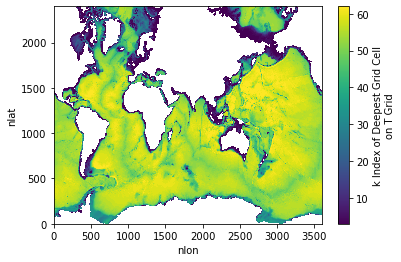

In [3]:
h = ds.KMT.where(ds.KMT > 0).plot()

And the coordinates: `TLAT`

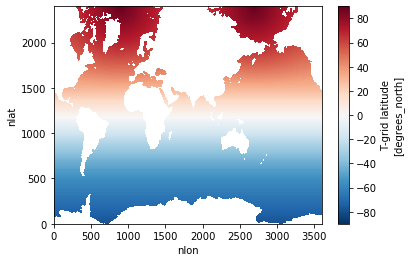

In [4]:
h = ds.TLAT.where(ds.KMT > 0).plot()

and `TLONG`

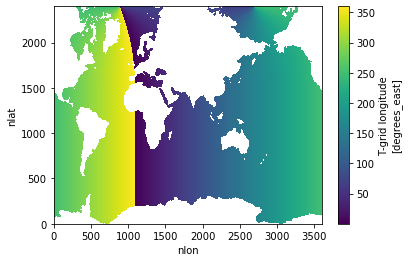

In [5]:
h = ds.TLONG.where(ds.KMT > 0).plot()

## SCRIP format

It is also possible to get the grid file in [SCRIP format](http://www.earthsystemmodeling.org/esmf_releases/public/last/ESMF_refdoc/node3.html#SECTION03028000000000000000) which is useful for regridding applications with ESMF.

In [6]:
ds = pop_tools.get_grid('POP_tx0.1v3', scrip=True)
ds.info()

xarray.Dataset {
dimensions:
	grid_corners = 4 ;
	grid_rank = 2 ;
	grid_size = 8640000 ;

variables:
	int32 grid_dims(grid_rank) ;
	float64 grid_center_lat(grid_size) ;
		grid_center_lat:units = degrees ;
	float64 grid_center_lon(grid_size) ;
		grid_center_lon:units = degrees ;
	float64 grid_corner_lat(grid_size, grid_corners) ;
		grid_corner_lat:units = degrees ;
	float64 grid_corner_lon(grid_size, grid_corners) ;
		grid_corner_lon:units = degrees ;
	int64 grid_imask(grid_size) ;
		grid_imask:units = unitless ;

// global attributes:
	:lateral_dims = [2400, 3600] ;
	:vertical_dims = 62 ;
	:vert_grid_file = tx0.1v3_vert_grid ;
	:horiz_grid_fname = inputdata/ocn/pop/tx0.1v3/grid/horiz_grid_200709.ieeer8 ;
	:topography_fname = inputdata/ocn/pop/tx0.1v3/grid/topography_20170718.ieeei4 ;
	:region_mask_fname = inputdata/ocn/pop/tx0.1v3/grid/region_mask_20170718.ieeei4 ;
	:type = tripole ;
	:title = POP_tx0.1v3 grid ;
	:conventions = SCRIP ;
}

In [7]:
%load_ext watermark
%watermark -d -iv -m -g 

xarray    0.15.0
pop_tools 0.0.post162+dirty
2020-02-16 

compiler   : Clang 9.0.1 
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 660afd92c60edfecdbd70332976d5bd80623e3d0
